Creating and visualazing datasets for linear regression

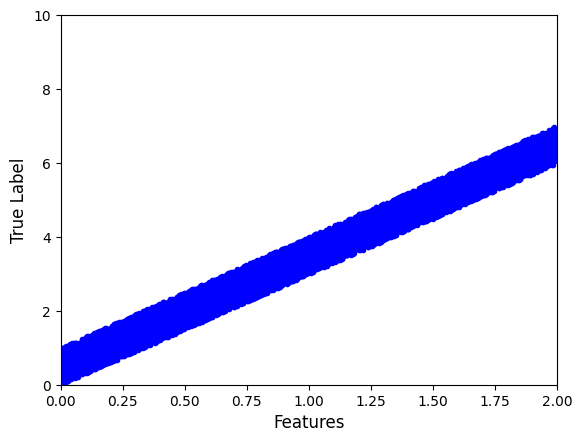

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(10000, 1) #X are 100 1-d feature vector
y = 3 * X + np.random.rand(10000, 1) #y are true label values of X

plt.plot(X, y, 'b.')
plt.xlabel("Features", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.axis([0,2, 0, 10])
plt.show()

Computing Gradient Descent with multiple learning rates.

iteration: 1, weight: [[0.53469299]], train loss: [[10.92943377]]
iteration: 2, weight: [[0.68631069]], train loss: [[9.81066542]]
iteration: 3, weight: [[0.82984808]], train loss: [[8.80796661]]
iteration: 4, weight: [[0.9657358]], train loss: [[7.90929543]]
iteration: 5, weight: [[1.09438153]], train loss: [[7.10385924]]
iteration: 6, weight: [[1.21617122]], train loss: [[6.38198513]]
iteration: 7, weight: [[1.33147026]], train loss: [[5.73500375]]
iteration: 8, weight: [[1.44062456]], train loss: [[5.15514514]]
iteration: 9, weight: [[1.5439616]], train loss: [[4.63544549]]
iteration: 10, weight: [[1.64179141]], train loss: [[4.16966344]]
iteration: 11, weight: [[1.73440748]], train loss: [[3.75220516]]
iteration: 12, weight: [[1.82208767]], train loss: [[3.37805719]]
iteration: 13, weight: [[1.90509504]], train loss: [[3.04272618]]
iteration: 14, weight: [[1.98367862]], train loss: [[2.74218496]]
iteration: 15, weight: [[2.05807418]], train loss: [[2.47282418]]
iteration: 16, weigh

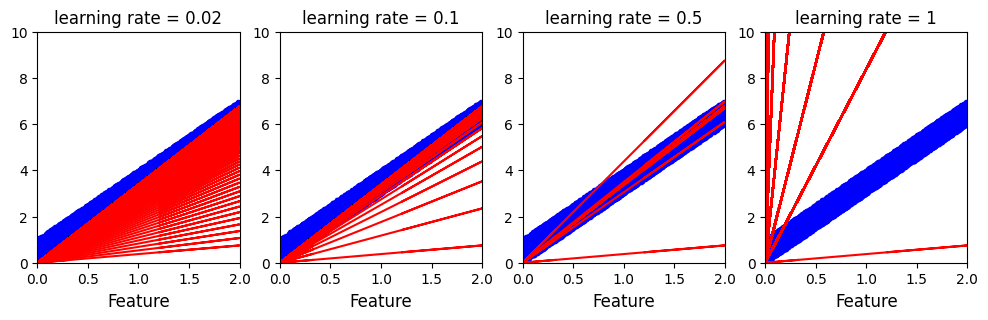

In [10]:
import time
epochs = 1000 #Number of epochs for updating weights

def compute_gradient_descent(w, eta):
    plt.plot(X, y, "b.")
    d_train = X.size

    for i in range(epochs):
        y_predict = X.dot(w)
        plt.plot(X, y_predict, "r-")
        gradient = 2/d_train * (w.dot(X.T) - y.T).dot(X)
        w = w - eta * gradient
        train_loss = 1/d_train * (w.dot(X.T) - y.T).dot((w.dot(X.T) - y.T).T)
        print('iteration: {}, weight: {}, train loss: {}'.format(i+1, w, train_loss))
    
    plt.xlabel("Feature", fontsize=12)
    plt.title("learning rate = {}".format(eta), fontsize=12)
    plt.axis([0, 2, 0, 10])
np.random.seed(42)
w = np.random.rand(1)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
compute_gradient_descent(w, 0.02)
plt.subplot(1, 4, 3)
compute_gradient_descent(w, 0.5)
plt.subplot(1, 4, 4)
compute_gradient_descent(w, 1)
plt.subplot(1, 4, 2)
t1 = time.time()
compute_gradient_descent(w, 0.1)
t2 = time.time()
print('The time used for learning rate = 0.1 is {}'.format(t2 - t1))

plt.show()


Stochastic Gradient Descent

epoch: 1, weight: [3.28661603], train loss: [[0.157403]]
epoch: 2, weight: [3.36361807], train loss: [[0.14621835]]
epoch: 3, weight: [3.55675448], train loss: [[0.18767839]]
epoch: 4, weight: [3.30512999], train loss: [[0.15327109]]
epoch: 5, weight: [3.33394131], train loss: [[0.14865771]]
epoch: 6, weight: [3.43642434], train loss: [[0.15017504]]
epoch: 7, weight: [3.20381255], train loss: [[0.18706055]]
epoch: 8, weight: [3.34384832], train loss: [[0.14758242]]
epoch: 9, weight: [3.45324229], train loss: [[0.15309726]]
epoch: 10, weight: [3.28204163], train loss: [[0.15856462]]
epoch: 11, weight: [3.34402581], train loss: [[0.14756554]]
epoch: 12, weight: [3.40952721], train loss: [[0.14706809]]
epoch: 13, weight: [3.42360289], train loss: [[0.14845355]]
epoch: 14, weight: [3.36338332], train loss: [[0.14622843]]
epoch: 15, weight: [3.2695241], train loss: [[0.16202837]]
epoch: 16, weight: [3.48618164], train loss: [[0.16100436]]
epoch: 17, weight: [3.30925027], train loss: [[0.152

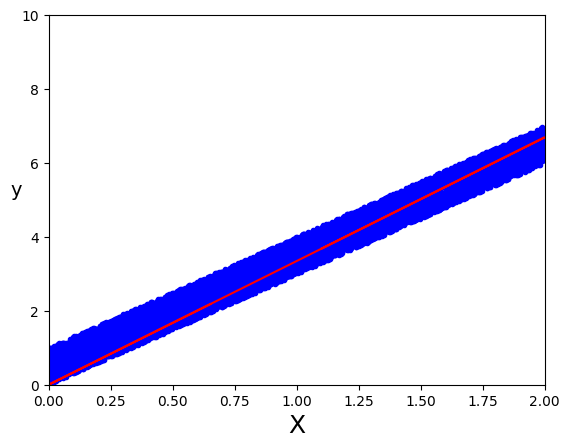

In [11]:
w = np.random.rand(1)
eta = 0.1
d_train = X.size
t1 = time.time()
for epoch in range(epochs):
    for i in range(d_train):
        xi = X[i]
        yi = y[i]
        gradient = 2 * (w.dot(xi.T) - yi.T).dot(xi)
        w = w - eta * gradient
    train_loss = 1/d_train * (w.dot(X.T) - y.T).dot((w.dot(X.T) - y.T).T)
    print('epoch: {}, weight: {}, train loss: {}'.format(epoch + 1, w, train_loss))

    indices = np.random.permutation(len(X))
    X = X[indices] #Suffle the input X
    y = y[indices] #Suffle the input y

t2 = time.time()
print('The time used: {}'.format(t2 - t1))

y_predict = X.dot(w.T)
plt.plot(X, y, 'b.')
plt.plot(X, y_predict, 'r-')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

Mini Batch Gradient Descent


epoch: 1, weight: [[3.35937523]], train loss: [[22.87864412]]
epoch: 2, weight: [[3.37769404]], train loss: [[22.79404364]]
epoch: 3, weight: [[3.38832355]], train loss: [[22.80901227]]
epoch: 4, weight: [[3.38026799]], train loss: [[22.79335179]]
epoch: 5, weight: [[3.38968358]], train loss: [[22.81432209]]
epoch: 6, weight: [[3.37111611]], train loss: [[22.80834419]]
epoch: 7, weight: [[3.37679865]], train loss: [[22.794931]]
epoch: 8, weight: [[3.38348853]], train loss: [[22.79637107]]
epoch: 9, weight: [[3.37441636]], train loss: [[22.79891747]]
epoch: 10, weight: [[3.3729189]], train loss: [[22.80263277]]
epoch: 11, weight: [[3.37095472]], train loss: [[22.80892149]]
epoch: 12, weight: [[3.38581797]], train loss: [[22.80124634]]
epoch: 13, weight: [[3.36720775]], train loss: [[22.8253731]]
epoch: 14, weight: [[3.41173247]], train loss: [[23.00785507]]
epoch: 15, weight: [[3.38183901]], train loss: [[22.79428515]]
epoch: 16, weight: [[3.39617924]], train loss: [[22.85030533]]
epoch

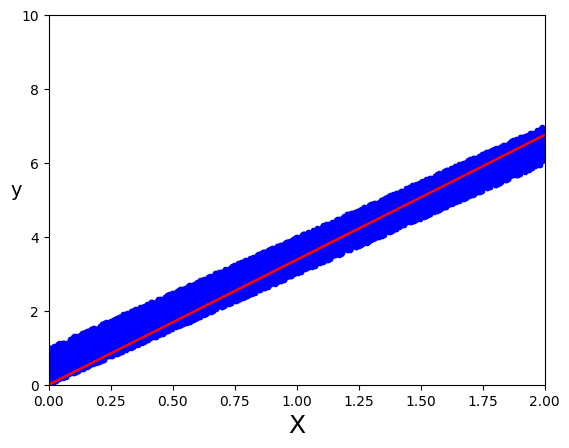

In [16]:
w = np.random.rand(1)
eta = 0.1
d_train = X.size
n_batches = 64

t1 = time.time()
for epoch in range(epochs):
    for i in range(0, d_train, n_batches):
        xi = X[i:i + n_batches]
        yi = y[i:i + n_batches]
        gradient = 2 / n_batches * (w.dot(xi.T) - yi.T).dot(xi)
        w = w - eta * gradient
    train_loss = 1/n_batches * (w.dot(X.T) - y.T).dot((w.dot(X.T) - y.T).T)
    print('epoch: {}, weight: {}, train loss: {}'.format(epoch + 1, w, train_loss))

    indices = np.random.permutation(len(X))
    X = X[indices] #Suffle the input X
    y = y[indices] #Suffle the input y

t2 = time.time()
print('The time used: {}'.format(t2 - t1))

y_predict = X.dot(w.T)
plt.plot(X, y, 'b.')
plt.plot(X, y_predict, 'r-')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()